In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from art_skills import SlnStrokeExpression

$$ \Lambda(t) = \frac{1}{\sigma\sqrt{2\pi}(t-t_0)} \exp{\left(-\frac{(\ln(t-t_0)-\mu)^2}{2\sigma^2}\right)} $$

In [72]:
def plot_sln_single(t0, D, th1, th2, sigma, mu):
    t = np.logspace(-5, 1, 100)
    if False:   # use c++ wrapped version
        sln_stroke = SlnStrokeExpression(t0, D, th1, th2, sigma, mu)
        v = np.array([sln_stroke.speed(t_) for t_ in t])
    else:       # use numpy version
        v = D / (sigma * np.sqrt(2 * np.pi) * (t - t0)) * np.exp(-np.square(np.log(t - t0) - mu) /
                                                                 (2 * sigma * sigma))
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.plot(np.log(t - t0), v)
    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 1)
    plt.title('Gaussian Curve: Velocity vs ln(t-t0)')
    plt.subplot(122)
    plt.plot(t, v)
    plt.ylim(0, 1)
    plt.xlim(0, 10)
    plt.title('Velocity vs Time')
    plt.show()

In [73]:
interactive_plot = widgets.interactive(plot_sln,
                                       t0=widgets.FloatSlider(min=-5, max=-1e-12, value=-0.1),
                                       D=widgets.FloatSlider(min=0, max=5, value=1),
                                       th1=widgets.fixed(0),
                                       th2=widgets.fixed(0),
                                       sigma=widgets.FloatSlider(min=1e-12, max=2, value=1),
                                       mu=widgets.FloatSlider(min=-5, max=5, value=0))

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=-0.1, description='t0', max=-1e-12, min=-5.0), FloatSlider(value=1.0, …

In [63]:
def plot_sln_array(ax, t0, D, th1, th2, sigma, mu):
    t = np.logspace(-5, 1, 100)
    v = D / (sigma * np.sqrt(2 * np.pi) * (t - t0)) * np.exp(-np.square(np.log(t - t0) - mu) /
                                                             (2 * sigma * sigma))
    ax.plot(t, v)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 10)

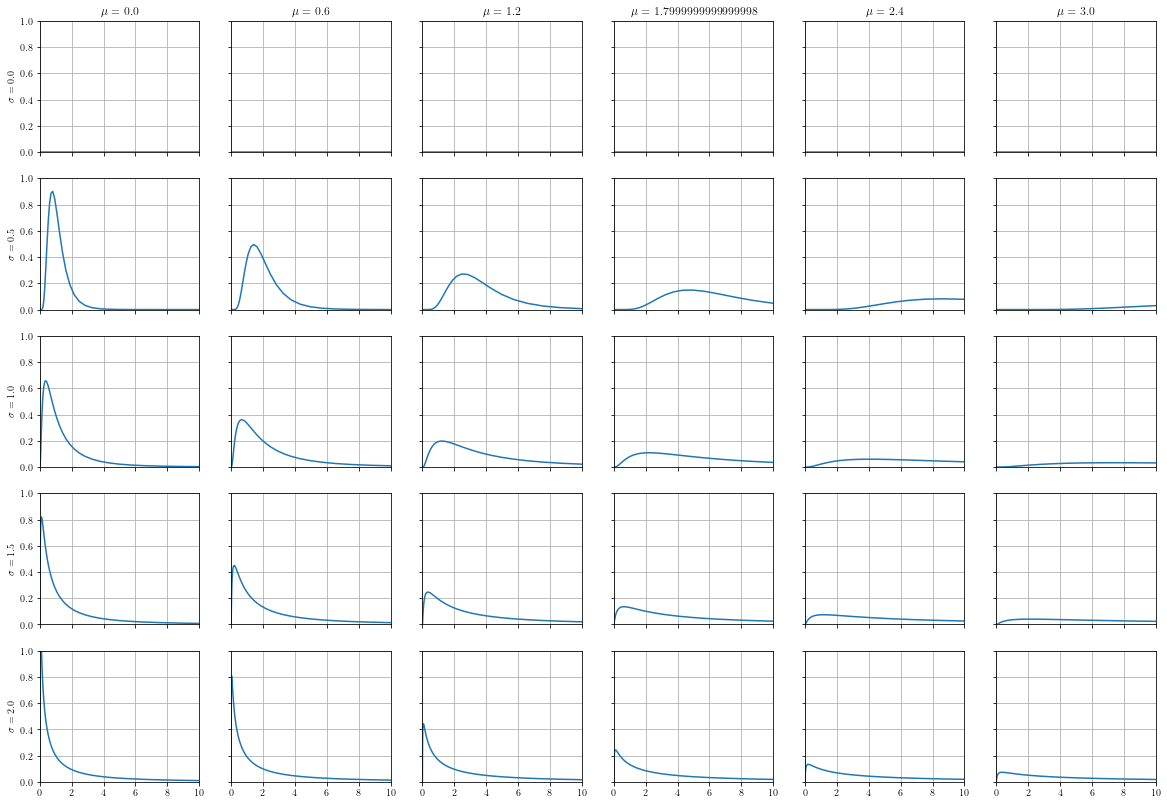

In [70]:
sigma_vals = np.linspace(1e-10, 2, 5)
mu_vals = np.linspace(0, 3, 6)
fig, axes = plt.subplots(len(sigma_vals), len(mu_vals), sharex=True, sharey=True, figsize=(20, 14))
for ri, sigma in enumerate(sigma_vals):
    for ci, mu in enumerate(mu_vals):
        plot_sln_array(axes[ri][ci], 0, 1, 0, 0, sigma, mu)
        axes[0][ci].set_title('$\\mu = {:}$'.format(mu))
    axes[ri][0].set_ylabel('$\\sigma = {:.1f}$'.format(sigma))